In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
np.random.seed(42)

#Load Dataset

In [6]:
#import dataset
#file_dir = 'D:\Sini-Project\Datasets\CalCOFI'
file1='bottle.csv'
file2 = 'cast.csv'
#file3 = 'small_bottle.csv'

dataset = pd.read_csv(file1)
print(dataset.shape)
print(dataset.columns)

<ipython-input-6-b3dc70fcecf6>:7: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file1)


(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [ ]:
cst_cnt_list = dataset['Cst_Cnt'].unique()
print(cst_cnt_list, len(cst_cnt_list))

[    1     2     3 ... 32131 32132 32133] 32133


In [12]:
print(dataset.head())

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [14]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


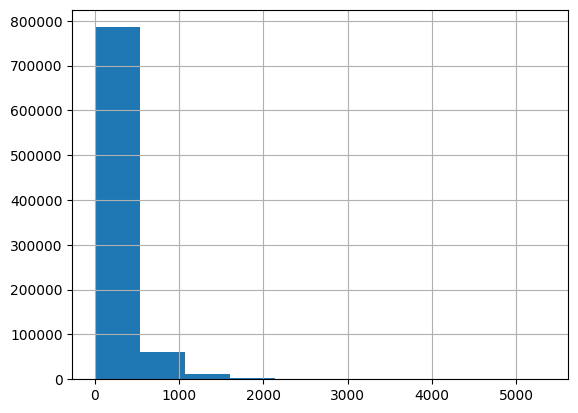

In [15]:
hist = dataset['Depthm'].hist(bins=10)

Remove instances with no readings for salinity

In [6]:
print(len(dataset), ', Nan values=', dataset['Salnty'].isna().sum(), ', Percentage=', round(dataset['Salnty'].isna().sum()/len(dataset),3)*100, '%')

840590 , Nan values= 47355 , Percentage= 5.6000000000000005 %


In [7]:
len(dataset[~dataset['Salnty'].isna()])
dataset_copy = dataset[~dataset['Salnty'].isna()]
print(dataset.shape)
print(dataset_copy.shape)

(864863, 74)
(817509, 74)


#Train Test Split based with stratified sampling based on depth

<Axes: >

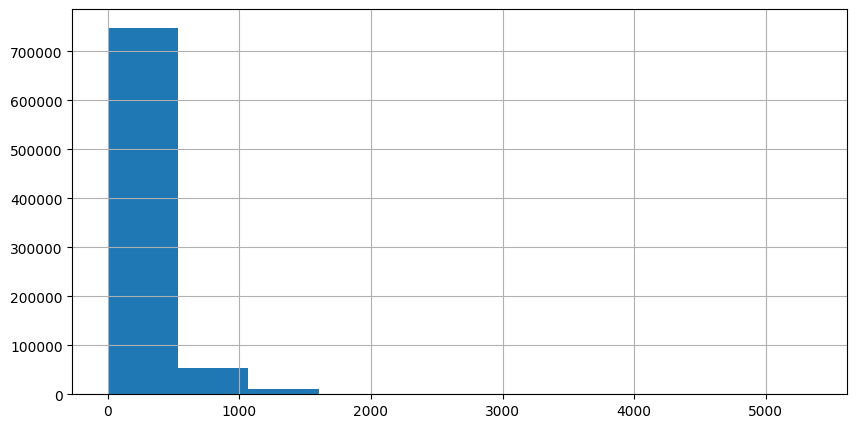

In [29]:
dataset_copy["Depthm"].hist(bins=10, figsize=(10,5))

In [8]:
depth_bins = np.arange(0,1000, 100)
import numpy as np
#depth_bins = np.arange(0,1500, 250)
depth_bins = np.append(depth_bins, [np.inf])
print(depth_bins)

[  0. 100. 200. 300. 400. 500. 600. 700. 800. 900.  inf]


In [9]:
depth_labels = np.arange(1, len(depth_bins))
print('labels=', depth_labels, len(depth_labels))

labels= [ 1  2  3  4  5  6  7  8  9 10] 10


In [10]:
dataset_copy = dataset_copy.ffill()
dataset_copy = dataset_copy.bfill()

In [11]:
print(dataset_copy[dataset_copy['Salnty'].isna()].index)
dataset_copy[dataset_copy['Depthm'].isna()]

Index([], dtype='int64')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment


In [19]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817509 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              817509 non-null  int64  
 1   Btl_Cnt              817509 non-null  int64  
 2   Sta_ID               817509 non-null  object 
 3   Depth_ID             817509 non-null  object 
 4   Depthm               817509 non-null  int64  
 5   T_degC               814247 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               664195 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118613 non-null  float64
 12  RecInd               817509 non-null  int64  
 13  T_prec               814247 non-null  float64
 14  T_qual               15408 non-null   float64
 15  S_prec               8

In [12]:
dataset_copy['depth_cat'] = pd.cut(dataset_copy['Depthm'],
                   bins = depth_bins,
                   labels = depth_labels)

<Axes: >

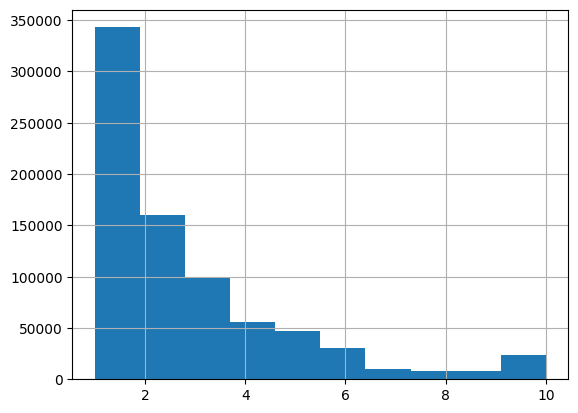

In [13]:
dataset_copy['depth_cat'].hist()

In [ ]:
dataset_copy.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment', 'depth_cat'],
      dtype='object')

In [14]:
depth_cat_na = dataset_copy[dataset_copy['depth_cat'].isna()]
print(depth_cat_na.loc[:, ['Depthm']].value_counts())

Depthm
0         31782
Name: count, dtype: int64


In [15]:
dataset_copy['depth_cat'] = dataset_copy['depth_cat'].fillna(1)

In [16]:
print(dataset_copy.shape)
print(dataset_copy['depth_cat'].shape)

(817509, 75)
(817509,)


<Axes: >

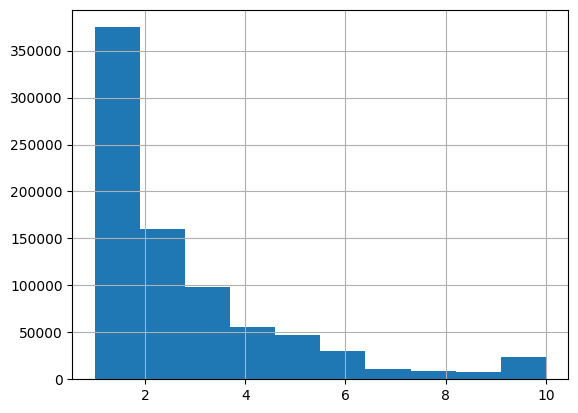

In [17]:
dataset_copy['depth_cat'].hist()

In [31]:
dataset_copy['Cst_Cnt'].sort_values()


0             1
28            1
27            1
26            1
25            1
          ...  
864860    34404
864861    34404
864858    34404
864859    34404
864862    34404
Name: Cst_Cnt, Length: 817509, dtype: int64

In [ ]:
dataset_copy['Cst_Cnt'].sort_values().value_counts()

Cst_Cnt
1817    56
2690    56
2417    56
2666    56
1809    55
        ..
1043     6
2754     6
2623     6
2705     6
1395     6
Name: count, Length: 2786, dtype: int64

In [35]:
dataset_copy['depth_cat'].value_counts(), dataset_copy['depth_cat'].value_counts()/len(dataset)*100

(depth_cat
 1     374871
 2     160574
 3      98674
 4      55473
 5      47086
 6      30011
 10     24021
 7      10439
 8       8499
 9       7861
 Name: count, dtype: int64,
 depth_cat
 1     43.344553
 2     18.566409
 3     11.409206
 4      6.414079
 5      5.444330
 6      3.470029
 10     2.777434
 7      1.207012
 8      0.982699
 9      0.908930
 Name: count, dtype: float64)

In [18]:
print(dataset_copy.shape)
print(dataset_copy['depth_cat'].shape)

(817509, 75)
(817509,)


In [36]:
len(dataset_copy[dataset_copy['depth_cat'].isna()])
dataset_copy[dataset_copy['depth_cat'].isna()].index

Index([], dtype='int64')

In [ ]:
len(dataset_copy[dataset_copy['Depthm'].isna()])
dataset_copy[dataset_copy['Depthm'].isna()].index

Index([], dtype='int64')

In [ ]:
len(dataset_copy[dataset_copy['Salnty'].isna()])
dataset_copy[dataset_copy['Salnty'].isna()].index

Index([], dtype='int64')

In [19]:
dataset_copy = dataset_copy.ffill()
dataset_copy = dataset_copy.bfill()
print(len(dataset_copy[dataset_copy['depth_cat'].isna()]))
dataset_copy[dataset_copy['depth_cat'].isna()].index

0


Index([], dtype='int64')

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [21]:
gen_obj = split_obj.split(dataset_copy, dataset_copy['depth_cat'])

Only 1 iterator because, n_split is 1

In [22]:
for i, (train_index, test_index) in enumerate(gen_obj):
    print(i,'. ',train_index, ', ', test_index)


0 .  [668632 581067 259995 ... 178046 185928 630531] ,  [324793 165488 716248 ... 620159 305808 136145]


In [23]:
print(len(train_index))
print(len(test_index))


654007
163502


Splitting dataset

In [24]:
dataset_copy.drop(['depth_cat'], axis=1, inplace=True)
dataset_copy.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [25]:
strat_train_set = dataset_copy.iloc[train_index]
strat_test_set = dataset_copy.iloc[test_index]

In [26]:
print(strat_train_set.columns)
print(strat_test_set.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_p

In [27]:
print(len(strat_train_set))
print(len(strat_test_set))

654007
163502


#Preprocessing

Discard categorical columns from both train set

In [28]:
#drop the categorical columns from both train set
cat_attributes = ['Cst_Cnt', 'Btl_Cnt','Sta_ID', 'Depth_ID','IncTim', 'DIC Quality Comment']
strat_train_set_num = strat_train_set.drop(cat_attributes, axis=1)

Numerical attributes - fill with median values

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Prepare Data

In [30]:
X_train = strat_train_set_num.drop(['Salnty','R_SALINITY','S_prec','S_qual'], axis=1)
X_train.columns

Index(['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'P_qual', 'O_qual', 'SThtaq',
       'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q',
       'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q',
       'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs',
       'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_TEMP', 'R_POTEMP', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [31]:
y_train = strat_train_set_num['Salnty'].copy()

In [32]:
strat_train_set_num.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,...,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000,654007.000000
mean,221.409567,10.865318,33.840476,3.072849,25.814375,51.222557,133.734619,2.960714,4.686702,2.017789,...,0.948414,0.433712,222.897448,192.259046,2036.435022,2323.121428,2246.319701,2317.586091,7.936113,8.042688
std,308.553409,4.227775,0.462089,2.152705,1.118275,38.243543,93.846226,4.706473,1.869681,0.150376,...,2.195834,0.556046,311.857461,43.625111,75.057047,37.266500,18.949062,19.277553,0.002326,0.031419
min,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,45.000000,7.760000,33.488000,0.790000,24.959000,11.200000,33.932750,1.000000,3.000000,2.000000,...,0.110000,0.090000,45.000000,201.000000,2014.820000,2327.910000,2241.570000,2317.390000,7.935900,8.047700
50%,125.000000,10.120000,33.863000,2.910000,25.988000,45.500000,126.623600,1.000000,3.000000,2.000000,...,0.640000,0.470000,126.000000,201.000000,2014.820000,2327.910000,2241.570000,2317.390000,7.935900,8.047700
75%,300.000000,13.940000,34.197000,5.390000,26.645000,93.900000,234.677850,1.000000,7.000000,2.000000,...,0.640000,0.470000,302.000000,201.000000,2014.820000,2327.910000,2241.570000,2317.390000,7.935900,8.047700
max,5351.000000,31.120000,37.034000,10.690000,250.784000,206.000000,466.512500,25.000000,7.000000,3.000000,...,55.250000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [33]:
X_train = num_pipeline.fit_transform(X_train)

In [34]:
strat_test_set_num = strat_test_set.drop(cat_attributes, axis=1)
X_test = strat_test_set_num.drop(['Salnty','R_SALINITY','S_prec','S_qual'], axis=1)
y_test = strat_test_set_num['Salnty'].copy()

In [35]:
X_test

,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
360686,1300,3.28,0.83,27.499,11.2,36.07575,1.0,7,2.0,9.0,...,0.64,0.47,1312,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
199217,500,4.72,1.24,26.987,17.3,53.92318,1.0,7,2.0,9.0,...,0.64,0.47,504,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
763555,200,8.44,3.19,26.413,48.4,138.79930,7.0,3,2.0,8.0,...,0.00,0.02,201,207.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
357633,900,3.72,0.46,27.350,6.3,19.99669,1.0,7,2.0,9.0,...,0.64,0.47,907,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
454972,50,13.13,0.91,25.486,12.3,39.55447,1.0,5,2.0,9.0,...,0.64,0.47,50,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125971,500,6.38,0.45,26.967,6.5,19.56927,1.0,7,2.0,9.0,...,0.64,0.47,503,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
595812,210,8.88,1.85,26.450,28.4,80.49199,1.0,3,2.0,9.0,...,0.01,0.03,211,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
667439,10,15.43,5.53,24.586,97.1,241.04350,1.0,7,2.0,9.0,...,0.96,0.37,10,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477
341576,200,12.48,4.64,25.641,76.9,202.04180,1.0,7,2.0,9.0,...,0.64,0.47,201,201.0,2014.82,2327.91,2241.57,2317.39,7.9359,8.0477


In [36]:
X_test = num_pipeline.transform(X_test)

In [37]:
X_test

array([[ 3.49563876, -1.7941643 , -1.04187541, ..., -0.010172  ,
        -0.09173782,  0.15953575],
       [ 0.90289278, -1.45355937, -0.85141724, ..., -0.010172  ,
        -0.09173782,  0.15953575],
       [-0.06938696, -0.5736633 ,  0.05442041, ..., -0.010172  ,
        -0.09173782,  0.15953575],
       ...,
       [-0.68516413,  1.0796898 ,  1.14142558, ..., -0.010172  ,
        -0.09173782,  0.15953575],
       [-0.06938696,  0.38192275,  0.72799199, ..., -0.010172  ,
        -0.09173782,  0.15953575],
       [-0.55552683,  0.0176647 , -0.9954222 , ..., -0.010172  ,
        -0.09173782,  0.15953575]])

#Learning the Models

Multilinear regression

In [38]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error

Evaluation on training Data

In [40]:
lin_y_pred = lin_regr.predict(X_train)
lin_mse = mean_squared_error(y_train, lin_y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.08106351501488976


TRAINING TIME TOO MUCH.   ---Linear SVM---

In [ ]:
from sklearn.svm import SVR
svm_regr = SVR(kernel = 'linear')
svm_regr.fit(X_train, y_train)

In [ ]:
svm_lin_y_pred = svm_regr.predict(X_train)
svm_lin_mse = mean_squared_error(y_train, svm_lin_y_pred)
svm_lin_rmse = np.sqrt(svm_lin_mse)
print(svm_lin_rmse)

Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_regr = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
rf_y_pred = forest_regr.predict(X_train)
forest_mse = mean_squared_error(y_train, rf_y_pred)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

0.005420540647152916


XGBoost

In [45]:
import xgboost
xg_regr = xgboost.XGBRegressor(seed = 42)
xg_regr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
xg_y_pred = xg_regr.predict(X_train)
xg_mse = mean_squared_error(y_train, xg_y_pred)
xg_rmse = np.sqrt(xg_mse)
print(xg_rmse)

0.028274160400586064


In [ ]:
from sklearn.model_selection import cross_val_score

#Evaluation on test data

In [43]:
lin_calcofi_pred = lin_regr.predict(X_test)
lin_rmse_test = np.sqrt(mean_squared_error(y_test, lin_calcofi_pred))
print('Multilinear Regression --> ', lin_rmse_test)

Linear Regression -->  0.749980093032928


Do not execute, SVM is not used here

In [ ]:
calcofi_pred = svm_regr.predict(X_test)
svm_lin_rmse_test = np.sqrt(mean_squared_error(y_test, calcofi_pred))
print('SVM Linear Regression --> ', svm_lin_rmse_test)

In [44]:
rf_calcofi_pred = forest_regr.predict(X_test)
forest_rmse_test = np.sqrt(mean_squared_error(y_test, rf_calcofi_pred))
print('Random Forest Regressor --> ', forest_rmse_test)

Random Forest Regressor -->  0.018280297463836737


In [47]:
xg_calcofi_pred = xg_regr.predict(X_test)
xg_rmse_test = np.sqrt(mean_squared_error(y_test, xg_calcofi_pred))
print('XGBoost --> ', xg_rmse_test)

XGBoost -->  0.034374131708068835


#Artificial Neural Network - Multilayer perceptron

In [48]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Split

In [49]:
from sklearn.model_selection import train_test_split
train_orig_set, test_orig_set = train_test_split(dataset, test_size=0.2)
print(train_orig_set.shape)
print(test_orig_set.shape)

(691890, 74)
(172973, 74)


In [50]:
train_set = train_orig_set.loc[~train_orig_set['Salnty'].isna()]
print(train_set.shape)

test_set = test_orig_set.loc[~test_orig_set['Salnty'].isna()]
print(test_set.shape)

(654130, 74)
(163379, 74)


In [51]:
X_train_full = train_set.drop(['Salnty', 'R_SALINITY','S_prec','S_qual'], axis=1)
X_train_full = X_train_full.drop(cat_attributes, axis=1)
X_train_full.columns

Index(['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'P_qual', 'O_qual', 'SThtaq',
       'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q',
       'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q',
       'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs',
       'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_TEMP', 'R_POTEMP', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [52]:
y_train_full = train_set['Salnty'].copy()

In [53]:
X_test = test_set.drop(['Salnty', 'R_SALINITY','S_prec','S_qual'], axis=1)
X_test = X_test.drop(cat_attributes, axis=1)
y_test = test_set['Salnty'].copy()
X_test.columns

Index(['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'P_qual', 'O_qual', 'SThtaq',
       'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q',
       'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q',
       'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs',
       'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_TEMP', 'R_POTEMP', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [54]:
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(654130, 64) (163379, 64) (654130,) (163379,)


Numerical attributes, fill with median values

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [55]:
X_train_full = num_pipeline.fit_transform(X_train_full)

In [56]:
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(654130, 64) (163379, 64) (654130,) (163379,)


In [57]:
X_train, X_valid = X_train_full[5000:], X_train_full[:5000]
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

In [58]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(649130, 64) (5000, 64) (649130,) (5000,)


Model

In [59]:
n_features = X_train.shape[1]
print(n_features)

64


In [68]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(n_features,)))
model.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(1, activation='relu'))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                650       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 747 (2.92 KB)
Trainable params: 747 (2.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


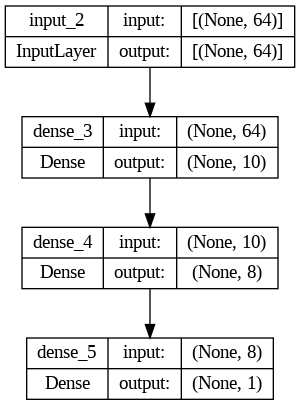

In [70]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

Compile the model

In [71]:
model.compile(optimizer='adam', loss='mse')

Learn the model

In [72]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/50
20286/20286 [==============================] - 43s 2ms/step - loss: 106.2612 - val_loss: 0.6450
Epoch 2/50
20286/20286 [==============================] - 38s 2ms/step - loss: 20.5392 - val_loss: 0.3629
Epoch 3/50
20286/20286 [==============================] - 40s 2ms/step - loss: 1.8129 - val_loss: 0.1256
Epoch 4/50
20286/20286 [==============================] - 41s 2ms/step - loss: 0.1344 - val_loss: 0.0321
Epoch 5/50
20286/20286 [==============================] - 43s 2ms/step - loss: 0.0933 - val_loss: 0.0216
Epoch 6/50
20286/20286 [==============================] - 43s 2ms/step - loss: 0.1311 - val_loss: 0.0181
Epoch 7/50
20286/20286 [==============================] - 45s 2ms/step - loss: 0.0569 - val_loss: 0.0113
Epoch 8/50
20286/20286 [==============================] - 42s 2ms/step - loss: 0.0528 - val_loss: 0.0137
Epoch 9/50
20286/20286 [==============================] - 40s 2ms/step - loss: 0.0503 - val_loss: 0.0083
Epoch 10/50
20286/20286 [===========================

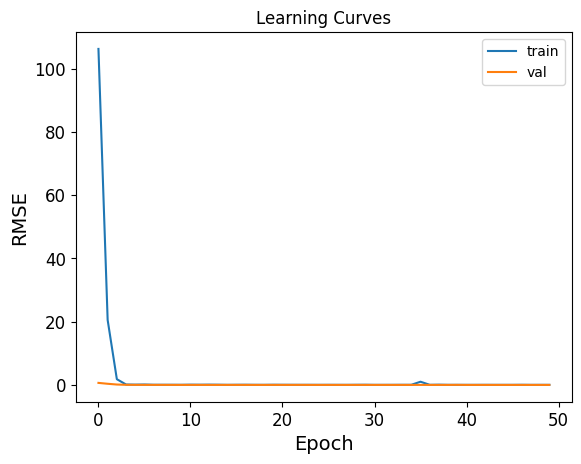

In [73]:
from matplotlib import pyplot as plt
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

#Evaluate the model

In [74]:
X_test = test_set.drop(['Salnty', 'R_SALINITY','S_prec','S_qual'], axis=1)
X_test = X_test.drop(cat_attributes, axis=1)
y_test = test_set['Salnty'].copy()
X_test.columns

Index(['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'P_qual', 'O_qual', 'SThtaq',
       'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q',
       'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q',
       'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs',
       'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_TEMP', 'R_POTEMP', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [79]:
X_test = num_pipeline.transform(X_test)

X_test = num_pipeline.transform(X_test)

In [80]:
loss= model.evaluate(X_test, y_test)

5106/5106 [==============================] - 9s 2ms/step - loss: 0.0094


In [76]:
print('Test loss', loss)

Test loss nan


In [81]:
mlp_rmse_test = np.sqrt(loss)
print('Multilayer Perceptron Regression --> ', mlp_rmse_test)

Multilayer Perceptron Regression -->  0.09719741796747773


In [82]:
y_pred = model.predict(X_test)
#lin_mse = mean_squared_error(y_test, calcofi_pred)
mlp_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('Multilayer Perceptron Regression --> ', mlp_rmse_test)

5106/5106 [==============================] - 9s 2ms/step
Multilayer Perceptron Regression -->  0.09719744499291574
